In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

C:\Users\Aredio\AppData\Local\Temp\ipykernel_27420\2372881667.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("./output.csv")

In [3]:

filtered_df_q1 = df[(df['Question Number'] == 1) & (df['Correct'] == True)]
count_q1_correct = filtered_df_q1.shape[0]
filtered_df_q2 = df[(df['Question Number'] == 2) & (df['Correct'] == True)]
count_q2_correct = filtered_df_q2.shape[0]
filtered_df_q3 = df[(df['Question Number'] == 3) & (df['Correct'] == True)]
count_q3_correct = filtered_df_q3.shape[0]

filtered_df_condition_j = df[(df['Condition'] == 'J') & (df['Correct'] == True)]
filtered_df_condition_j['Time Taken'] = pd.to_timedelta('00:' + filtered_df_condition_j['Time Taken']).dt.total_seconds()
average_time_condition_j = filtered_df_condition_j['Time Taken'].mean()

filtered_df_condition_s = df[(df['Condition'] == 'S') & (df['Correct'] == True)]
filtered_df_condition_s['Time Taken'] = pd.to_timedelta('00:' + filtered_df_condition_s['Time Taken']).dt.total_seconds()
average_time_condition_s = filtered_df_condition_s['Time Taken'].mean()

filtered_df_condition_d = df[(df['Condition'] == 'D') & (df['Correct'] == True)]
filtered_df_condition_d['Time Taken'] = pd.to_timedelta('00:' + filtered_df_condition_d['Time Taken']).dt.total_seconds()
average_time_condition_d = filtered_df_condition_d['Time Taken'].mean()

print(f"Question 1: {count_q1_correct} Correct, {108 - count_q1_correct} Incorrect")
print(f"Question 2: {count_q2_correct} Correct, {108 - count_q2_correct} Incorrect")
print(f"Question 3: {count_q3_correct} Correct, {108 - count_q3_correct} Incorrect")
print(f"Average time for correct answer Juxta: {average_time_condition_j} seconds")
print(f"Average time for correct answer Super: {average_time_condition_s} seconds")
print(f"Average time for correct answer Difference: {average_time_condition_d} seconds")


Question 1: 157 Correct, -49 Incorrect
Question 2: 72 Correct, 36 Incorrect
Question 3: 153 Correct, -45 Incorrect
Average time for correct answer Juxta: 27.5 seconds
Average time for correct answer Super: 23.93984962406015 seconds
Average time for correct answer Difference: 24.218487394957982 seconds


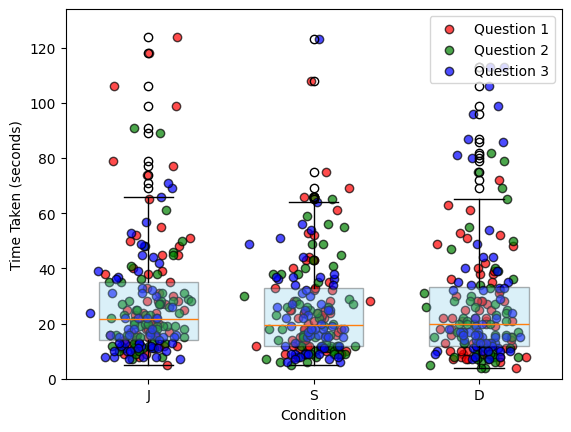

In [10]:
df = pd.read_csv("./output.csv")
color_map = {1: 'red', 2: 'green', 3: 'blue'}
conditions = ['J', 'S', 'D']
data = {}
for condition in conditions:
    temp_df = df[df['Condition'] == condition]
    temp_df['Time Taken'] = pd.to_timedelta('00:' + temp_df['Time Taken']).dt.total_seconds()
    data[condition] = temp_df

fig, ax = plt.subplots()

for i, condition in enumerate(conditions):
    times = data[condition]['Time Taken']

    bp = ax.boxplot(times, positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor='skyblue',alpha=0.3))

    for question_number in color_map:
        q_times = data[condition][data[condition]['Question Number'] == question_number]['Time Taken']
        jittered_x = np.random.normal(i, 0.12, size=len(q_times))
        ax.scatter(jittered_x, q_times, color=color_map[question_number], edgecolor='black', alpha=0.7, label=f'Question {question_number}' if i == 0 else "")

ax.set_xlabel('Condition')
ax.set_ylabel('Time Taken (seconds)')

ax.set_xticks(range(len(conditions)))
ax.set_xticklabels(conditions)

max_time = max(max(data[condition]['Time Taken']) for condition in conditions)
ax.set_ylim(0, max_time + 10)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

In [5]:

df['Time Taken'] = pd.to_timedelta('00:' + df['Time Taken']).dt.total_seconds()

color_map = {1: 'red', 2: 'green', 3: 'blue'}

filtered_df = df.groupby(['Question Number', 'Condition', 'Repetition']).filter(lambda x: all(x['Correct']))

fig, ax = plt.subplots()

conditions = ['J', 'S', 'D']
for i, condition in enumerate(conditions):
    condition_data = df[df['Condition'] == condition]
    condition_filtered_data = filtered_df[filtered_df['Condition'] == condition]

    bp = ax.boxplot(condition_data['Time Taken'], positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor='skyblue',alpha=0.3))

    for question_number in color_map:
        q_times = condition_filtered_data[condition_filtered_data['Question Number'] == question_number]['Time Taken']
        jittered_x = np.random.normal(i, 0.04, size=len(q_times))
        ax.scatter(jittered_x, q_times, color=color_map[question_number], edgecolor='black', alpha=0.7, label=f'Question {question_number}' if i == 0 else "")

ax.set_xlabel('Condition')
ax.set_ylabel('Time Taken (seconds)')

ax.set_xticks(range(len(conditions)))
ax.set_xticklabels(conditions)

max_time = max(df['Time Taken'])
ax.set_ylim(0, max_time + 10)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

print("Grouping datapoints by Question ,Condition and Repetition and filtering correct ones")

plt.show()
   

Grouping datapoints by Question ,Condition and Repetition and filtering correct ones


In [6]:
filtered_df = df.groupby(['Question Number', 'Condition', 'Repetition']).filter(lambda x: all(x['Correct']))

conditions = ['J', 'S', 'D']
question_numbers = filtered_df['Question Number'].unique()

for question_number in question_numbers:
    fig, ax = plt.subplots()
    question_data = filtered_df[filtered_df['Question Number'] == question_number]
    
    for i, condition in enumerate(conditions):
        condition_data = question_data[question_data['Condition'] == condition]
        
        # Create boxplot
        bp = ax.boxplot(condition_data['Time Taken'], positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color_map[question_number],alpha=0.3))
        
        # Scatter plot for this question number
        jittered_x = np.random.normal(i, 0.04, size=len(condition_data['Time Taken']))
        ax.scatter(jittered_x, condition_data['Time Taken'], color=color_map[question_number], edgecolor='black', alpha=0.7)

    # Set the X and Y axis labels
    ax.set_xlabel('Condition')
    ax.set_ylabel('Time Taken (seconds)')

    # Set the X-ticks to correspond to the conditions
    ax.set_xticks(range(len(conditions)))
    ax.set_xticklabels(conditions)

    # Set the Y-axis to range from 0 to the maximum 'Time Taken' value + a small margin
    max_time = max(question_data['Time Taken'])
    ax.set_ylim(0, max_time + 10)

    # Add a title indicating the 'Question Number'
    ax.set_title(f'Question Number: {question_number}')
    
    # Display the plot
    plt.show()
    
    # Print the detailed statistics for this 'Question Number'
    print(f"Statistics for Question Number {question_number}:")
    for condition in conditions:
        condition_data = question_data[question_data['Condition'] == condition]
        print(f"Condition {condition}: Max: {condition_data['Time Taken'].max()}, Min: {condition_data['Time Taken'].min()}, Mean: {condition_data['Time Taken'].mean()}, Median: {condition_data['Time Taken'].median()}")
    print("\n")  # Add a newline for better readability between plots

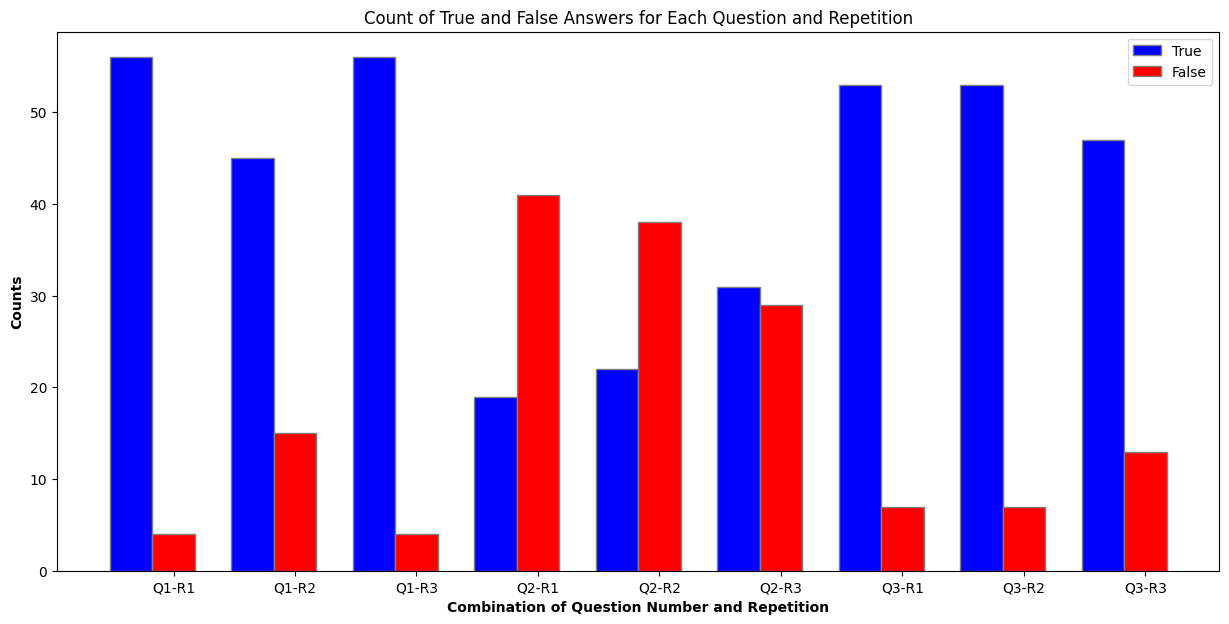

In [7]:
question_numbers = df['Question Number'].unique()
repetitions = df['Repetition'].unique()

# Initialize a figure
fig, ax = plt.subplots(figsize=(15, 7))

# Width of a bar
bar_width = 0.35

# Initialize the position of the first bar on the X axis
r1 = np.arange(len(question_numbers) * len(repetitions))

# Data for plotting
true_counts = []
false_counts = []

# Collect data for each combination of question and repetition
for question in question_numbers:
    for repetition in repetitions:
        filtered_df = df[(df['Question Number'] == question) & (df['Repetition'] == repetition)]
        true_count = filtered_df[filtered_df['Correct'] == True].shape[0]
        false_count = filtered_df[filtered_df['Correct'] == False].shape[0]
        true_counts.append(true_count)
        false_counts.append(false_count)

# Create bars for true counts
plt.bar(r1, true_counts, color='b', width=bar_width, edgecolor='grey', label='True')

# Create bars for false counts, next to the previous ones
plt.bar(r1 + bar_width, false_counts, color='r', width=bar_width, edgecolor='grey', label='False')

# General layout
plt.xlabel('Combination of Question Number and Repetition', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(r1))], [f'Q{q}-R{r}' for q in question_numbers for r in repetitions])
plt.title('Count of True and False Answers for Each Question and Repetition')
plt.legend()

# Show the plot
plt.show()

In [8]:
data = pd.read_csv("./output.csv")
data = data[data['Correct'] == True]

# Convert 'Time Taken' to total seconds
data['Time Taken'] = pd.to_timedelta('00:' + data['Time Taken']).dt.total_seconds()

# Create a combined column for 'Question Number' and 'Repetition' to use on the x-axis
data['Question-Repetition'] = data['Question Number'].astype(str) + '-' + data['Repetition'].astype(str)

# Create a new combined x-axis entry
data['QR-Condition'] = data['Question-Repetition'] + ' ' + data['Condition']

# Sort the data by 'QR-Condition'
data = data.sort_values(by='QR-Condition')

# Plotting
plt.figure(figsize=(12, 6))
sns.stripplot(data=data, x='QR-Condition', y='Time Taken', hue='Condition', jitter=True, palette='deep')

plt.title('Time Taken for each Question, Repetition, and Condition')
plt.xlabel('Question Number - Repetition - Condition')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=90)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()

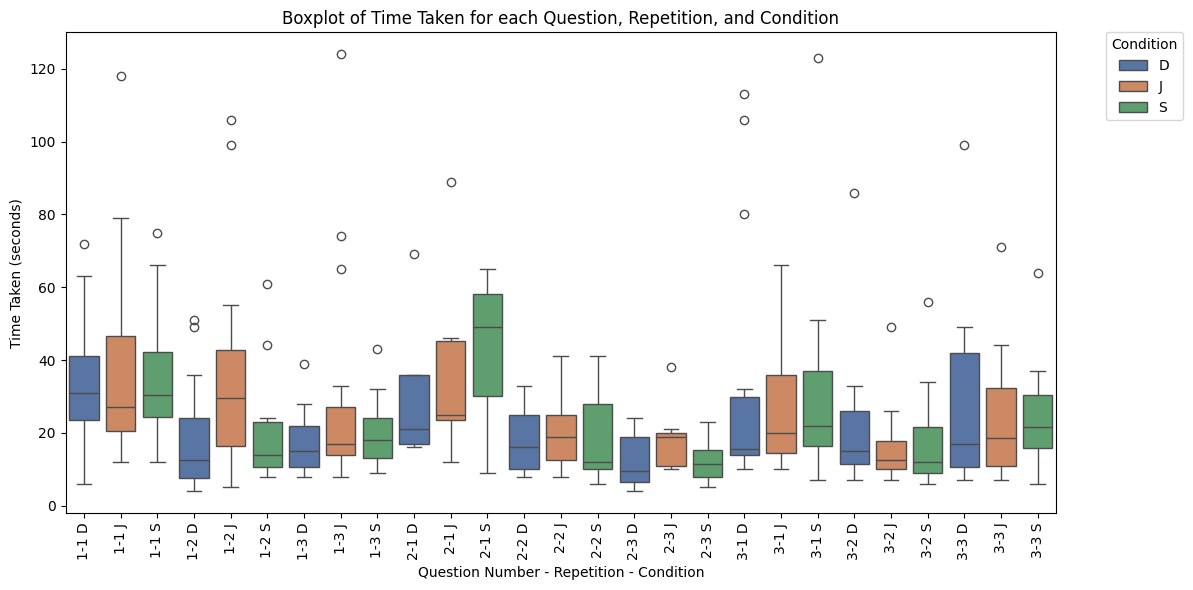

In [9]:
data = pd.read_csv("./output.csv")
data = data[data['Correct'] == True]
# Convert 'Time Taken' to total seconds
data['Time Taken'] = pd.to_timedelta('00:' + data['Time Taken']).dt.total_seconds()

# Create a combined column for 'Question Number' and 'Repetition' to use on the x-axis
data['Question-Repetition'] = data['Question Number'].astype(str) + '-' + data['Repetition'].astype(str)

# Create a new combined x-axis entry
data['QR-Condition'] = data['Question-Repetition'] + ' ' + data['Condition']

# Sort the data by 'QR-Condition'
data = data.sort_values(by='QR-Condition')

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='QR-Condition', y='Time Taken', hue='Condition', palette='deep')

plt.title('Boxplot of Time Taken for each Question, Repetition, and Condition')
plt.xlabel('Question Number - Repetition - Condition')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=90)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()